In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [99]:
nepox = 100
h = 0.5

In [100]:
n = 7

In [101]:
x = -np.ones((10,16))

In [102]:
x = np.array([
    [1,
     1, 1, 1,
     1, -1, 1,
     1, -1, 1,
     1, -1, 1,
     1, 1, 1],

    [1,
     -1, -1, 1,
     -1, -1, 1,
     -1, -1, 1,
     -1, -1, 1,
     -1, -1, 1],

    [1,
     1, 1, 1,
     -1, -1, 1,
     1, 1, 1,
     1, -1, -1,
     1, 1, 1],

    [1,
     1, 1, 1,
     -1, -1, 1,
     1, 1, 1,
     -1, -1, 1,
     1, 1, 1],

    [1,
     1, -1, 1,
     1, -1, 1,
     1, 1, 1,
     -1, -1, 1,
     -1, -1, 1],

    [1,
     1, 1, 1,
     1, -1, -1,
     1, 1, 1,
     -1, -1, 1,
     1, 1, 1],

    [1,
     1, 1, 1,
     1, -1, -1,
     1, 1, 1,
     1, -1, 1,
     1, 1, 1],

    [1,
     1, 1, 1,
     -1, -1, 1,
     -1, -1, 1,
     -1, -1, 1,
     -1, -1, 1],

    [1,
     1, 1, 1,
     1, -1, 1,
     1, 1, 1,
     1, -1, 1,
     1, 1, 1],

    [1,
     1, 1, 1,
     1, -1, 1,
     1, 1, 1,
     -1, -1, 1,
     1, 1, 1]
])

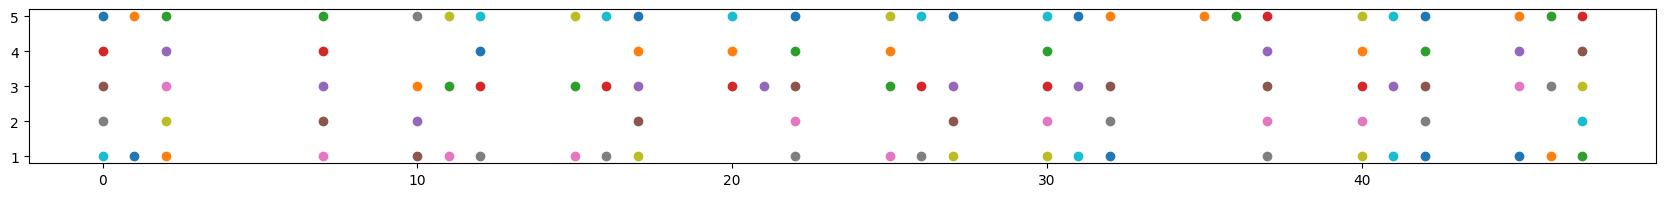

In [103]:
plt.figure(figsize=(21,2))
for dig, _x in enumerate(x):
    for i in range(5):
        for j in range(3):
            if _x[1+i*3 + j] == 1:
                plt.scatter(dig*5 + j, 5-i)

In [104]:
w = np.random.random((10,16)) - 0.5

In [105]:
e2 = np.zeros(nepox)
xp = np.zeros((1,16))

In [106]:
wlg = np.zeros((3, nepox*10))

In [107]:
(w @ xp.T).shape

(10, 1)

In [108]:
for k in range(nepox):
    e2[k] = 0
    for m in range(10):
        d = np.zeros((1,10))
        y = np.zeros((1,10))
        d[0,m] = 1
        for j in range(16):
            xp[0,j] = x[m,j]
        u = w @ xp.T
        for i in range(10):
            if u[i,0]>=0:
                y[0,i] = 1
            else:
                y[0,i] = 0
        e = d - y
        w = w + h * (e.T @ xp)
        e2[k] = e2[k] + (e @ e.T)
        nit = k*10 + m
        wlg[0, nit] = w[n,0]
        wlg[1, nit] = w[n,1]
        wlg[2, nit] = w[n,15]

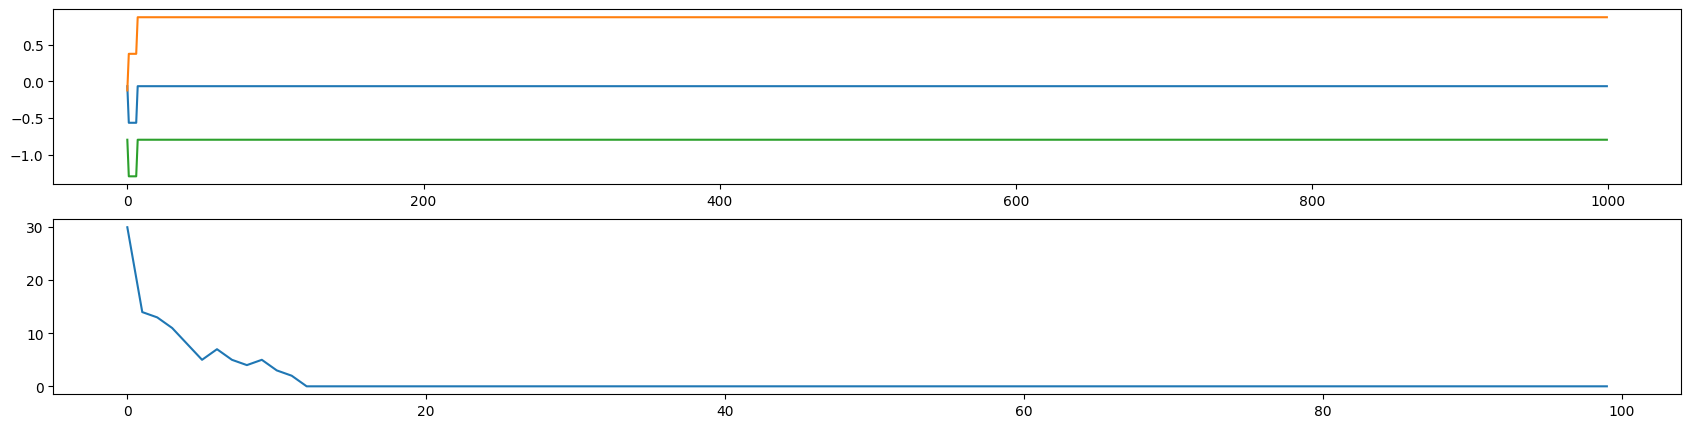

In [109]:
fig, ax = plt.subplots(2, figsize=(21,5))
ax[0].plot(range(nepox*10), wlg[0,:])
ax[0].plot(range(nepox*10), wlg[1,:])
ax[0].plot(range(nepox*10), wlg[2,:])

ax[1].plot(range(nepox),e2)
# # Set axis limits
# ax.set_xlim(0, 6)
# ax.set_ylim(0, 6)

# Show the plot
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [110]:
np.argmax(w @ x[3])

3

In [111]:
np.argmax(w @ x.T, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)